## Clustering and Strategy


Q4. What are the implications of these results for influencers and firms? In addition to addressing this question in general, select one of the accounts represented in the
dataset and recommend a strategy they could use to grow their audience. [30 points]

### 0. Data Load 

In [1]:
import sqlalchemy 
import pymysql
import pandas as pd
import numpy as np

In [2]:
# Connection details
user = "admin"
password = "tuIzaqrAKLMe32G0"
host = "instagram-data-db.csik1hfjt1qb.us-east-1.rds.amazonaws.com"
port = 3306
db = "instagram_data"
connection_engine = sqlalchemy.create_engine('mysql+pymysql://' + user + ':' + password + '@' + host + ':' + str(port) + '/' + db , echo=True)
# You can use user, password, port and db info to connect via MySQL Workbench

In [3]:
# Write your SQL through this way in Python (returns a Pandas dataframe)
## Show all tables:
pd.read_sql("show tables", con = connection_engine)
## Read in LIWC2015 text table:
text_data = pd.read_sql('select * from ins_text_data',con=connection_engine)
## Read in account info table
instagram_data = pd.read_sql('select * from ins_account_data',con=connection_engine)
## Read in account level summarized table
instagram_data_lv = pd.read_sql('select * from ins_account_data_account_lv',con=connection_engine)

2022-04-08 03:23:29,260 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'sql_mode'
2022-04-08 03:23:29,262 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-04-08 03:23:29,302 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2022-04-08 03:23:29,304 INFO sqlalchemy.engine.Engine [generated in 0.00183s] {}
2022-04-08 03:23:29,345 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2022-04-08 03:23:29,347 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-04-08 03:23:29,427 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2022-04-08 03:23:29,429 INFO sqlalchemy.engine.Engine [generated in 0.00289s] {'table_schema': 'instagram_data', 'table_name': 'show tables'}
2022-04-08 03:23:29,472 INFO sqlalchemy.engine.Engine show tables
2022-04-08 03:23:29,474 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-04-08 03:23:29,539 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM informat

In [4]:
text_data

,index,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,0,12,62.04,99.00,23.51,25.77,3.00,16.67,58.33,41.67,...,0.00,0.0,0.0,0.0,16.67,0.00,0.00,8.33,16.67,16.67
1,1,3,93.26,50.00,1.00,25.77,3.00,33.33,33.33,0.00,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,33.33
2,2,26,74.94,64.99,83.83,99.00,8.67,11.54,84.62,57.69,...,3.85,0.0,0.0,0.0,3.85,0.00,0.00,7.69,0.00,3.85
3,3,3,99.00,50.00,1.00,25.77,3.00,66.67,33.33,33.33,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,66.67
4,4,22,93.26,67.52,31.94,99.00,7.33,22.73,81.82,50.00,...,0.00,0.0,0.0,0.0,4.55,0.00,0.00,4.55,0.00,9.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256135,256135,88,90.88,45.48,1.00,25.77,22.00,42.05,9.09,2.27,...,7.95,0.0,0.0,0.0,2.27,2.27,1.14,0.00,0.00,22.73
256136,256136,24,88.46,33.83,1.00,92.40,24.00,58.33,16.67,4.17,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,75.00
256137,256137,17,85.92,27.83,1.00,25.77,17.00,35.29,23.53,5.88,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,52.94
256138,256138,8,93.26,50.00,74.76,25.77,8.00,37.50,50.00,25.00,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,12.50


In [5]:
instagram_data

,index,Account,User Name,Followers at Posting,Post Created,Type,Total Interactions,Likes,Comments,Views,...,Description_subjective_score,Description_len,Image_Text_len,account_effect,Type_cate,anomaly_ind,Followers_at_Posting_pct_change,Total_Interactions_pct_change,Likes_pct_change,Comments_pct_change
0,0,Rebecca Ferguson,officialrebeccaferguson,404268.0,2021-10-17 13:29:58,Album,104703,104238,465,0,...,0.000000,76,0.0,297234.538462,0,0,0.000000,1.457702,1.458849,1.224880
1,1,Rebecca Ferguson,officialrebeccaferguson,490753.0,2021-11-15 11:42:52,Album,102836,102426,410,0,...,0.500000,150,0.0,297234.538462,0,0,0.007748,1.397557,1.404536,0.389831
2,2,Rebecca Ferguson,officialrebeccaferguson,472941.0,2021-11-04 17:52:59,Photo,101672,101230,442,0,...,0.000000,29,0.0,297234.538462,1,0,0.021158,0.468803,0.467208,0.955752
3,3,Rebecca Ferguson,officialrebeccaferguson,333044.0,2021-08-06 16:40:38,Photo,99049,97849,1200,0,...,0.900000,141,0.0,297234.538462,1,0,0.001022,4.777473,4.745347,9.619469
4,4,Rebecca Ferguson,officialrebeccaferguson,533227.0,2021-12-31 15:39:14,Album,98218,97230,988,0,...,0.694444,85,0.0,297234.538462,0,0,0.002787,1.441169,1.431479,3.016260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256135,256135,Travel Blogger Revati Charles,differentdoors,29898.0,2019-08-04 01:10:06,Photo,747,738,9,0,...,0.533333,1139,0.0,22904.099822,1,0,-0.000668,-0.350435,-0.352063,-0.181818
256136,256136,marcvetri,marcvetri,39603.0,2017-08-25 18:56:00,Photo,747,729,18,0,...,0.400000,109,0.0,59085.961818,1,0,0.000632,-0.201070,-0.205016,0.000000
256137,256137,Max Eli,thesussmans,12670.0,2019-03-28 10:21:22,Photo,747,731,16,0,...,0.437698,1877,0.0,21546.686441,1,0,0.005316,-0.191558,-0.205435,3.000000
256138,256138,Kit Lee,itskitlee,44012.0,2017-11-25 08:52:37,Photo,747,734,13,0,...,0.439177,1002,0.0,36941.444277,1,0,0.000205,-0.122209,-0.125149,0.083333


In [6]:
instagram_data_lv

,index,User Name,Followers at Posting - last,Followers at Posting - max,Followers at Posting - var,post_count,Total Interactions - median,Total Interactions - max,Total Interactions - var,Comments - median,...,Description_pos_sentiment - sum,is_linked - sum,Description_len - median,Description_len - max,Image_Text_len - median,Image_Text_len - max,Type_cate - median,Description_subjective_pct,Description_pos_sentiment_pct,is_linked_pct
0,0,35_fitz,46492.0,49687.0,8.329371e+07,111,1310.0,5672,8.856545e+05,32.0,...,52,111,38.0,421,0.0,206.0,1.0,0.0,0.468468,1.0
1,1,703richard,30157.0,30157.0,5.479998e+07,2,1185.0,1529,2.366720e+05,14.5,...,0,2,28.0,53,0.0,0.0,2.0,0.0,0.000000,1.0
2,2,77flippedofficial,16019.0,35284.0,6.707295e+07,137,1192.0,11887,2.308615e+06,17.0,...,13,137,3.0,293,0.0,37.0,1.0,0.0,0.094891,1.0
3,3,80miles,11347.0,11647.0,3.124544e+04,9,883.0,1206,1.784661e+04,32.0,...,6,9,82.0,950,0.0,0.0,1.0,0.0,0.666667,1.0
4,4,8nicknovak,10885.0,11048.0,1.313980e+06,23,933.0,1768,8.489577e+04,19.0,...,11,23,68.0,556,0.0,156.0,1.0,0.0,0.478261,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1267,zaruhy,20953.0,26010.0,4.647896e+06,29,990.0,4035,6.472846e+05,14.0,...,2,29,111.0,1403,0.0,0.0,1.0,0.0,0.068966,1.0
1268,1268,zeredbassett,60741.0,61053.0,7.311378e+07,207,3818.0,14884,5.289490e+06,74.0,...,62,207,30.0,394,0.0,9.0,2.0,0.0,0.299517,1.0
1269,1269,ziggy_ansah,69132.0,73794.0,2.278524e+08,157,2391.0,14260,4.226326e+06,33.0,...,66,157,63.0,530,0.0,314.0,1.0,0.0,0.420382,1.0
1270,1270,zuzanavrablova,11790.0,12568.0,2.036243e+06,81,850.0,2105,6.255209e+04,11.0,...,32,81,79.0,913,0.0,0.0,0.0,0.0,0.395062,1.0


### 1. Data Preprocessing 

In [7]:
df_dummy =instagram_data.copy()
df_dummy = df_dummy[['User Name']]
df_dummy

,User Name
0,officialrebeccaferguson
1,officialrebeccaferguson
2,officialrebeccaferguson
3,officialrebeccaferguson
4,officialrebeccaferguson
...,...
256135,differentdoors
256136,marcvetri
256137,thesussmans
256138,itskitlee


In [8]:
df_text = pd.concat([df_dummy, text_data],axis=1)
df_text = df_text.drop(columns=['index'])
df_text

,User Name,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,officialrebeccaferguson,12,62.04,99.00,23.51,25.77,3.00,16.67,58.33,41.67,...,0.00,0.0,0.0,0.0,16.67,0.00,0.00,8.33,16.67,16.67
1,officialrebeccaferguson,3,93.26,50.00,1.00,25.77,3.00,33.33,33.33,0.00,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,33.33
2,officialrebeccaferguson,26,74.94,64.99,83.83,99.00,8.67,11.54,84.62,57.69,...,3.85,0.0,0.0,0.0,3.85,0.00,0.00,7.69,0.00,3.85
3,officialrebeccaferguson,3,99.00,50.00,1.00,25.77,3.00,66.67,33.33,33.33,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,66.67
4,officialrebeccaferguson,22,93.26,67.52,31.94,99.00,7.33,22.73,81.82,50.00,...,0.00,0.0,0.0,0.0,4.55,0.00,0.00,4.55,0.00,9.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256135,differentdoors,88,90.88,45.48,1.00,25.77,22.00,42.05,9.09,2.27,...,7.95,0.0,0.0,0.0,2.27,2.27,1.14,0.00,0.00,22.73
256136,marcvetri,24,88.46,33.83,1.00,92.40,24.00,58.33,16.67,4.17,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,75.00
256137,thesussmans,17,85.92,27.83,1.00,25.77,17.00,35.29,23.53,5.88,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,52.94
256138,itskitlee,8,93.26,50.00,74.76,25.77,8.00,37.50,50.00,25.00,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,12.50


In [9]:
#Group By Account - taking every variable's average for account
df_text_lv = df_text.groupby('User Name').mean()
df_text_lv

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
User Name,,,,,,,,,,,,,,,,,,,,,
35_fitz,29.008929,83.733929,60.939821,40.581161,59.937500,10.733036,28.140268,59.354196,29.105982,6.623839,...,2.158214,0.484018,0.035893,0.408571,5.272143,3.634018,1.053929,1.010446,0.394554,20.854821
703richard,11.000000,98.790000,67.070000,70.690000,25.770000,4.500000,49.165000,50.000000,17.500000,0.000000,...,10.000000,0.000000,0.000000,0.000000,4.165000,0.000000,0.000000,0.000000,0.000000,45.000000
77flippedofficial,30.979021,73.259371,61.461608,46.693986,61.331119,10.229720,22.282098,66.452517,34.205664,9.458252,...,1.514755,0.361538,0.000000,0.323287,3.190070,1.106783,1.664126,1.716364,0.737902,14.969580
80miles,14.333333,95.685556,65.687778,39.707778,65.981111,10.333333,38.254444,58.365556,30.046667,7.158889,...,0.370000,0.000000,0.000000,0.000000,3.147778,0.505556,0.000000,0.000000,3.703333,28.142222
8nicknovak,38.739130,77.802174,65.169130,43.227391,58.549565,12.324348,25.440000,68.218261,36.625652,9.946957,...,1.905217,0.136522,0.076957,0.334783,4.413913,0.357391,0.125652,1.171304,1.019130,19.552174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zaruhy,21.344828,83.041034,60.091724,43.673448,66.142069,7.927931,28.425172,63.161034,32.201724,9.180690,...,1.178966,0.202759,0.000000,0.160345,3.365172,0.484138,0.356552,1.876552,1.094138,19.169310
zeredbassett,33.530516,71.414272,55.829155,44.076948,60.441596,10.281690,23.399484,62.860376,31.301690,10.077793,...,1.671080,0.396103,0.004272,0.556009,2.782817,0.642113,0.543521,2.063803,0.772770,13.124085
ziggy_ansah,38.585987,74.816115,61.113949,42.570318,60.116815,9.385096,23.532611,65.040573,33.806624,9.200382,...,1.781465,0.935287,0.005860,0.302166,4.792866,0.857452,0.724841,1.779427,0.694204,14.911274


In [10]:
df_account_lv = instagram_data_lv.drop(columns=['index'])
df_account_lv.set_index('User Name', inplace=True)
df_account_lv

,Followers at Posting - last,Followers at Posting - max,Followers at Posting - var,post_count,Total Interactions - median,Total Interactions - max,Total Interactions - var,Comments - median,Comments - max,Comments - var,...,Description_pos_sentiment - sum,is_linked - sum,Description_len - median,Description_len - max,Image_Text_len - median,Image_Text_len - max,Type_cate - median,Description_subjective_pct,Description_pos_sentiment_pct,is_linked_pct
User Name,,,,,,,,,,,,,,,,,,,,,
35_fitz,46492.0,49687.0,8.329371e+07,111,1310.0,5672,8.856545e+05,32.0,679,4938.972154,...,52,111,38.0,421,0.0,206.0,1.0,0.0,0.468468,1.0
703richard,30157.0,30157.0,5.479998e+07,2,1185.0,1529,2.366720e+05,14.5,28,364.500000,...,0,2,28.0,53,0.0,0.0,2.0,0.0,0.000000,1.0
77flippedofficial,16019.0,35284.0,6.707295e+07,137,1192.0,11887,2.308615e+06,17.0,321,1426.322027,...,13,137,3.0,293,0.0,37.0,1.0,0.0,0.094891,1.0
80miles,11347.0,11647.0,3.124544e+04,9,883.0,1206,1.784661e+04,32.0,81,474.611111,...,6,9,82.0,950,0.0,0.0,1.0,0.0,0.666667,1.0
8nicknovak,10885.0,11048.0,1.313980e+06,23,933.0,1768,8.489577e+04,19.0,167,1585.964427,...,11,23,68.0,556,0.0,156.0,1.0,0.0,0.478261,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zaruhy,20953.0,26010.0,4.647896e+06,29,990.0,4035,6.472846e+05,14.0,66,221.004926,...,2,29,111.0,1403,0.0,0.0,1.0,0.0,0.068966,1.0
zeredbassett,60741.0,61053.0,7.311378e+07,207,3818.0,14884,5.289490e+06,74.0,695,6267.155668,...,62,207,30.0,394,0.0,9.0,2.0,0.0,0.299517,1.0
ziggy_ansah,69132.0,73794.0,2.278524e+08,157,2391.0,14260,4.226326e+06,33.0,635,6955.041565,...,66,157,63.0,530,0.0,314.0,1.0,0.0,0.420382,1.0


In [11]:
#Merge account and text 
df_agg = pd.concat([df_account_lv, df_text_lv],axis=1)
df_agg

,Followers at Posting - last,Followers at Posting - max,Followers at Posting - var,post_count,Total Interactions - median,Total Interactions - max,Total Interactions - var,Comments - median,Comments - max,Comments - var,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
User Name,,,,,,,,,,,,,,,,,,,,,
35_fitz,46492.0,49687.0,8.329371e+07,111,1310.0,5672,8.856545e+05,32.0,679,4938.972154,...,2.158214,0.484018,0.035893,0.408571,5.272143,3.634018,1.053929,1.010446,0.394554,20.854821
703richard,30157.0,30157.0,5.479998e+07,2,1185.0,1529,2.366720e+05,14.5,28,364.500000,...,10.000000,0.000000,0.000000,0.000000,4.165000,0.000000,0.000000,0.000000,0.000000,45.000000
77flippedofficial,16019.0,35284.0,6.707295e+07,137,1192.0,11887,2.308615e+06,17.0,321,1426.322027,...,1.514755,0.361538,0.000000,0.323287,3.190070,1.106783,1.664126,1.716364,0.737902,14.969580
80miles,11347.0,11647.0,3.124544e+04,9,883.0,1206,1.784661e+04,32.0,81,474.611111,...,0.370000,0.000000,0.000000,0.000000,3.147778,0.505556,0.000000,0.000000,3.703333,28.142222
8nicknovak,10885.0,11048.0,1.313980e+06,23,933.0,1768,8.489577e+04,19.0,167,1585.964427,...,1.905217,0.136522,0.076957,0.334783,4.413913,0.357391,0.125652,1.171304,1.019130,19.552174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zaruhy,20953.0,26010.0,4.647896e+06,29,990.0,4035,6.472846e+05,14.0,66,221.004926,...,1.178966,0.202759,0.000000,0.160345,3.365172,0.484138,0.356552,1.876552,1.094138,19.169310
zeredbassett,60741.0,61053.0,7.311378e+07,207,3818.0,14884,5.289490e+06,74.0,695,6267.155668,...,1.671080,0.396103,0.004272,0.556009,2.782817,0.642113,0.543521,2.063803,0.772770,13.124085
ziggy_ansah,69132.0,73794.0,2.278524e+08,157,2391.0,14260,4.226326e+06,33.0,635,6955.041565,...,1.781465,0.935287,0.005860,0.302166,4.792866,0.857452,0.724841,1.779427,0.694204,14.911274


In [16]:
df_agg.isnull().sum()

Followers at Posting - last     0
Followers at Posting - max      0
Followers at Posting - var     28
post_count                      0
Total Interactions - median     0
                               ..
Dash                            0
Quote                           0
Apostro                         0
Parenth                         0
OtherP                          0
Length: 120, dtype: int64

In [17]:
df_agg = df_agg.dropna()

In [18]:
#Storing all the user names
user_names = list(df_agg.index)
len(user_names)

1244

### 2. Feature selection using Random Forest 

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Creating DataSet
X = df_agg
feature_names=X.columns
feature_names

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X,user_names , test_size=0.3, random_state = 13)

In [20]:
#Using Random Forest to Select Important Predictors

model = RandomForestClassifier(random_state=13, n_estimators=500, bootstrap=True, oob_score=True, max_features='sqrt')
model.fit(x_train,y_train,)

/Users/cheukyeehon/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier(max_features='sqrt', n_estimators=500, oob_score=True,
                       random_state=13)

In [22]:
prediction = model.predict(x_test)

In [23]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier())
sel.fit(X, user_names)
selected_features = X.columns[(sel.get_support())]
selected_features

Index(['Followers at Posting - last', 'Followers at Posting - max',
       'Followers at Posting - var', 'post_count',
       'Total Interactions - median', 'Total Interactions - max',
       'Total Interactions - var', 'Comments - median', 'Comments - max',
       'Comments - var', 'Views - max', 'Views - var',
       'Overperforming Score - median', 'Overperforming Score - max',
       'Overperforming Score - var', 'Description_pos_sentiment - sum',
       'is_linked - sum', 'Description_len - median', 'Description_len - max',
       'Image_Text_len - max', 'Description_pos_sentiment_pct', 'WC', 'Clout',
       'WPS', 'they', 'adverb', 'conj', 'adj', 'number', 'quant', 'affect',
       'anx', 'anger', 'insight', 'cause', 'certain', 'hear', 'feel', 'sexual',
       'achieve', 'reward', 'focusfuture', 'leisure', 'home', 'relig', 'death',
       'swear', 'assent', 'nonflu', 'filler', 'Period', 'QMark', 'Exclam',
       'Dash', 'Apostro', 'Parenth'],
      dtype='object')

In [24]:
#Using top selected features in clustering analysis

X_selected = X[['Followers at Posting - last', 'Followers at Posting - max',
       'Followers at Posting - var', 'post_count',
       'Total Interactions - median', 'Total Interactions - max',
       'Total Interactions - var', 'Comments - median', 'Comments - max',
       'Comments - var', 'Views - max', 'Views - var',
       'Overperforming Score - median', 'Overperforming Score - max',
       'Overperforming Score - var', 'Description_pos_sentiment - sum',
       'is_linked - sum', 'Description_len - median', 'Description_len - max',
       'Image_Text_len - max', 'Description_pos_sentiment_pct', 'WC', 'Clout',
       'WPS', 'they', 'adverb', 'conj', 'adj', 'number', 'quant', 'affect',
       'anx', 'anger', 'insight', 'cause', 'certain', 'hear', 'feel', 'sexual',
       'achieve', 'reward', 'focusfuture', 'leisure', 'home', 'relig', 'death',
       'swear', 'assent', 'nonflu', 'filler', 'Period', 'QMark', 'Exclam',
       'Dash', 'Apostro', 'Parenth']]
X_selected

,Followers at Posting - last,Followers at Posting - max,Followers at Posting - var,post_count,Total Interactions - median,Total Interactions - max,Total Interactions - var,Comments - median,Comments - max,Comments - var,...,swear,assent,nonflu,filler,Period,QMark,Exclam,Dash,Apostro,Parenth
User Name,,,,,,,,,,,,,,,,,,,,,
35_fitz,46492.0,49687.0,8.329371e+07,111,1310.0,5672,8.856545e+05,32.0,679,4938.972154,...,0.124643,0.084375,0.096429,0.000000,4.695804,0.408571,5.272143,3.634018,1.010446,0.394554
703richard,30157.0,30157.0,5.479998e+07,2,1185.0,1529,2.366720e+05,14.5,28,364.500000,...,0.000000,0.000000,0.000000,0.000000,13.335000,0.000000,4.165000,0.000000,0.000000,0.000000
77flippedofficial,16019.0,35284.0,6.707295e+07,137,1192.0,11887,2.308615e+06,17.0,321,1426.322027,...,0.251958,0.636713,0.337692,0.000000,9.074126,0.323287,3.190070,1.106783,1.716364,0.737902
80miles,11347.0,11647.0,3.124544e+04,9,883.0,1206,1.784661e+04,32.0,81,474.611111,...,0.000000,0.528889,0.000000,0.000000,5.394444,0.000000,3.147778,0.505556,0.000000,3.703333
8nicknovak,10885.0,11048.0,1.313980e+06,23,933.0,1768,8.489577e+04,19.0,167,1585.964427,...,0.000000,0.106087,0.038696,0.000000,3.896957,0.334783,4.413913,0.357391,1.171304,1.019130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zaruhy,20953.0,26010.0,4.647896e+06,29,990.0,4035,6.472846e+05,14.0,66,221.004926,...,0.000000,0.114828,0.114828,0.000000,10.645172,0.160345,3.365172,0.484138,1.876552,1.094138
zeredbassett,60741.0,61053.0,7.311378e+07,207,3818.0,14884,5.289490e+06,74.0,695,6267.155668,...,0.254131,0.210610,0.016620,0.000000,11.090141,0.556009,2.782817,0.642113,2.063803,0.772770
ziggy_ansah,69132.0,73794.0,2.278524e+08,157,2391.0,14260,4.226326e+06,33.0,635,6955.041565,...,0.246178,0.252038,0.140191,0.014650,7.305287,0.302166,4.792866,0.857452,1.779427,0.694204


### 3. Accounts Clustering with K-Means

In [25]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

from sklearn import metrics

In [26]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X_selected)

Text(0, 0.5, 'WCSS')

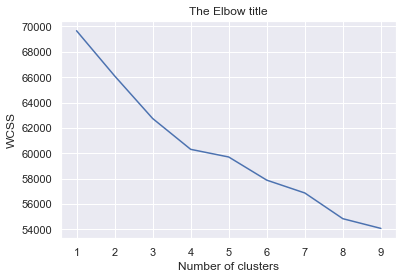

In [27]:
#Using Elbow Method to find optimal number of clusters

wcss=[]
for i in range(1,10):
    kmeans = KMeans(i,random_state = 13)
    kmeans.fit(X_std)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

From the gragh, we can choose 4 as the optimal level of clusters

In [28]:
#K-Means Clustering
kmeans = KMeans(4,random_state = 13)
kmeans.fit(X_std)

KMeans(n_clusters=4, random_state=13)

In [29]:
kmeans.inertia_

60312.50259745905

In [30]:
labels = kmeans.fit_predict(X_std)

X_selected = X_selected.copy()
X_selected['Cluster Class'] = pd.Series(labels,index=X_selected.index)

X_selected[X_selected['Cluster Class']==0]

,Followers at Posting - last,Followers at Posting - max,Followers at Posting - var,post_count,Total Interactions - median,Total Interactions - max,Total Interactions - var,Comments - median,Comments - max,Comments - var,...,assent,nonflu,filler,Period,QMark,Exclam,Dash,Apostro,Parenth,Cluster Class
User Name,,,,,,,,,,,,,,,,,,,,,
35_fitz,46492.0,49687.0,8.329371e+07,111,1310.0,5672,8.856545e+05,32.0,679,4938.972154,...,0.084375,0.096429,0.000000,4.695804,0.408571,5.272143,3.634018,1.010446,0.394554,0
703richard,30157.0,30157.0,5.479998e+07,2,1185.0,1529,2.366720e+05,14.5,28,364.500000,...,0.000000,0.000000,0.000000,13.335000,0.000000,4.165000,0.000000,0.000000,0.000000,0
77flippedofficial,16019.0,35284.0,6.707295e+07,137,1192.0,11887,2.308615e+06,17.0,321,1426.322027,...,0.636713,0.337692,0.000000,9.074126,0.323287,3.190070,1.106783,1.716364,0.737902,0
80miles,11347.0,11647.0,3.124544e+04,9,883.0,1206,1.784661e+04,32.0,81,474.611111,...,0.528889,0.000000,0.000000,5.394444,0.000000,3.147778,0.505556,0.000000,3.703333,0
8nicknovak,10885.0,11048.0,1.313980e+06,23,933.0,1768,8.489577e+04,19.0,167,1585.964427,...,0.106087,0.038696,0.000000,3.896957,0.334783,4.413913,0.357391,1.171304,1.019130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ytravelblog,43377.0,45270.0,6.809179e+06,27,837.0,1415,2.557649e+04,45.0,866,60474.179487,...,0.214444,0.000000,0.000000,15.629630,0.241481,1.930000,2.917407,2.008148,0.948889,0
zach.haroutunian,84550.0,85152.0,1.101650e+08,82,4948.5,11356,2.045044e+06,3.5,46,78.223427,...,0.188780,0.162561,0.025732,15.355122,1.095366,4.740122,0.332683,2.093780,0.375976,0
zaruhy,20953.0,26010.0,4.647896e+06,29,990.0,4035,6.472846e+05,14.0,66,221.004926,...,0.114828,0.114828,0.000000,10.645172,0.160345,3.365172,0.484138,1.876552,1.094138,0


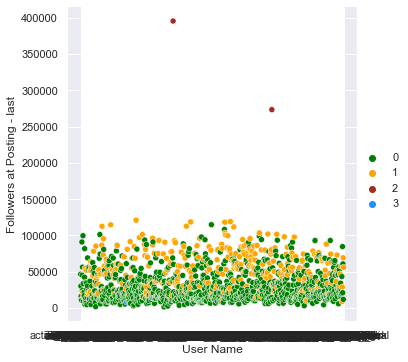

In [32]:
#Plot cluster membership
sns.relplot(x = X_selected.index, y = 'Followers at Posting - last', hue=labels, data=X_selected, 
            palette=['green','orange','brown','dodgerblue']);

In [33]:
#Count observations in each cluster
import collections, numpy
collections.Counter(labels)

Counter({0: 911, 1: 329, 3: 2, 2: 2})

In [34]:
#Attributes of each cluster center
kmeans.cluster_centers_

names = []
for i in X_selected.columns:
    names.append(i)

input_list = names
cluster1 = kmeans.cluster_centers_[0]
cluster2 = kmeans.cluster_centers_[1]
cluster3 = kmeans.cluster_centers_[2]
cluster4 = kmeans.cluster_centers_[3]
#cluster5 = kmeans.cluster_centers_[4]
#cluster6 = kmeans.cluster_centers_[5]
  
for i in range(24):
    print(input_list[i]+"-0:"+str(cluster1[i]))
    print(input_list[i]+"-1:"+str(cluster2[i]))
    print(input_list[i]+"-2:"+str(cluster3[i]))
    print(input_list[i]+"-3:"+str(cluster4[i]))
    #print(input_list[i]+"-5:"+str(cluster5[i]))
    #print(input_list[i]+"-6:"+str(cluster6[i]))

Followers at Posting - last-0:-0.2709446636244405
Followers at Posting - last-1:0.6900681904112412
Followers at Posting - last-2:10.84344048479324
Followers at Posting - last-3:-0.9443635265098901
Followers at Posting - max-0:-0.3115636630980772
Followers at Posting - max-1:0.7892434812342264
Followers at Posting - max-2:13.004647096242664
Followers at Posting - max-3:-0.9179512180987395
Followers at Posting - var-0:-0.09993581082915323
Followers at Posting - var-1:0.13090117667863063
Followers at Posting - var-2:24.129907059614254
Followers at Posting - var-3:-0.1423887905696856
post_count-0:-0.44256922395268394
post_count-1:1.2293493026660165
post_count-2:0.06166420640091943
post_count-3:-0.6993429845130553
Total Interactions - median-0:-0.11642688489362352
Total Interactions - median-1:0.23926236106361018
Total Interactions - median-2:14.148439527313183
Total Interactions - median-3:-0.4746518532315207
Total Interactions - max-0:-0.2449671909448925
Total Interactions - max-1:0.56723

In [35]:
#Silhouette Score to measure performance of model

from sklearn.metrics import silhouette_samples
silhouette = silhouette_samples(X_selected,labels)

df = pd.DataFrame({'label':labels,'silhouette':silhouette})
print('Average Silhouette Score for Cluster 0: ',numpy.average(df[df['label'] == 0].silhouette))
print('Average Silhouette Score for Cluster 1: ',numpy.average(df[df['label'] == 1].silhouette))
print('Average Silhouette Score for Cluster 2: ',numpy.average(df[df['label'] == 2].silhouette))
print('Average Silhouette Score for Cluster 3: ',numpy.average(df[df['label'] == 3].silhouette))
#print('Average Silhouette Score for Cluster 4: ',numpy.average(df[df['label'] == 4].silhouette))
#print('Average Silhouette Score for Cluster 5: ',numpy.average(df[df['label'] == 5].silhouette))

from sklearn.metrics import silhouette_score
silhouette_score(X_selected,labels)

Average Silhouette Score for Cluster 0:  0.8871037850540991
Average Silhouette Score for Cluster 1:  -0.8110502431352595
Average Silhouette Score for Cluster 2:  0.7584455714392282
Average Silhouette Score for Cluster 3:  -0.500776923808494


0.43555575200003666

### 4. Cluster and Account Shortlisting

In [45]:
X_selected[['chelseaspack' in s for s in X_selected.index]]

,Followers at Posting - last,Followers at Posting - max,Followers at Posting - var,post_count,Total Interactions - median,Total Interactions - max,Total Interactions - var,Comments - median,Comments - max,Comments - var,...,assent,nonflu,filler,Period,QMark,Exclam,Dash,Apostro,Parenth,Cluster Class
User Name,,,,,,,,,,,,,,,,,,,,,
chelseaspack,28125.0,28578.0,3.933035e+07,333,1295.0,7440,681779.150186,21.0,229,414.850212,...,0.228318,0.23015,0.007477,7.625435,0.647297,4.951802,0.48015,2.12973,0.598318,0


In [42]:
X_selected[X_selected['Cluster Class']==2].sort_values(['Followers at Posting - last'],ascending=False).to_csv('cluster2.csv') 
X_selected[X_selected['Cluster Class']==2].sort_values(['Followers at Posting - last'],ascending=False)

,Followers at Posting - last,Followers at Posting - max,Followers at Posting - var,post_count,Total Interactions - median,Total Interactions - max,Total Interactions - var,Comments - median,Comments - max,Comments - var,...,assent,nonflu,filler,Period,QMark,Exclam,Dash,Apostro,Parenth,Cluster Class
User Name,,,,,,,,,,,,,,,,,,,,,
elizabethreaser,395362.0,395362.0,1.420404e+10,211,9495.0,63632,1.025029e+08,52.0,761,8646.507967,...,0.064550,0.037441,0.0,8.671137,0.588815,3.351137,1.284976,1.796635,0.602844,2
officialrebeccaferguson,273263.0,554779.0,1.760996e+10,225,25549.0,104703,5.711088e+08,213.0,1330,42254.600714,...,0.153333,0.541197,0.0,9.739145,0.448034,4.565085,0.728205,2.574359,0.394274,2


In [43]:
X_selected[X_selected['Cluster Class']==3].sort_values(['Followers at Posting - last'],ascending=False).to_csv('cluster3.csv')  
X_selected[X_selected['Cluster Class']==3].sort_values(['Followers at Posting - last'],ascending=False)  

,Followers at Posting - last,Followers at Posting - max,Followers at Posting - var,post_count,Total Interactions - median,Total Interactions - max,Total Interactions - var,Comments - median,Comments - max,Comments - var,...,assent,nonflu,filler,Period,QMark,Exclam,Dash,Apostro,Parenth,Cluster Class
User Name,,,,,,,,,,,,,,,,,,,,,
danielleguldin,12832.0,13425.0,1.167240e+07,22,1043.5,82907,3.038374e+08,66.0,3022,396065.326840,...,0.0,1.656818,0.0,11.536364,0.553636,6.364545,0.735455,3.779091,0.232273,3
bret_lockett,8183.0,18962.0,2.376623e+07,7,796.0,79803,8.908006e+08,18.0,201,5298.952381,...,0.0,0.000000,0.0,23.174286,0.000000,6.168571,0.000000,0.427143,0.878571,3


In [55]:
choices = ['thomasjack','chelseaspack', # cluster 0
           'alilandry','_tim_barry_', # cluster 1
           'elizabethreaser','officialrebeccaferguson', # cluster 2
           'danielleguldin','bret_lockett'] # cluster 3

Account
Ali landry                       AxesSubplot(0.125,0.2;0.775x0.68)
Bret Lockett - Business Coach    AxesSubplot(0.125,0.2;0.775x0.68)
Chelsea Spack                    AxesSubplot(0.125,0.2;0.775x0.68)
Danielle Guldin                  AxesSubplot(0.125,0.2;0.775x0.68)
Elizabeth Reaser                 AxesSubplot(0.125,0.2;0.775x0.68)
Rebecca Ferguson                 AxesSubplot(0.125,0.2;0.775x0.68)
TIM BARRY                        AxesSubplot(0.125,0.2;0.775x0.68)
Thomas Jack                      AxesSubplot(0.125,0.2;0.775x0.68)
Name: Followers at Posting, dtype: object

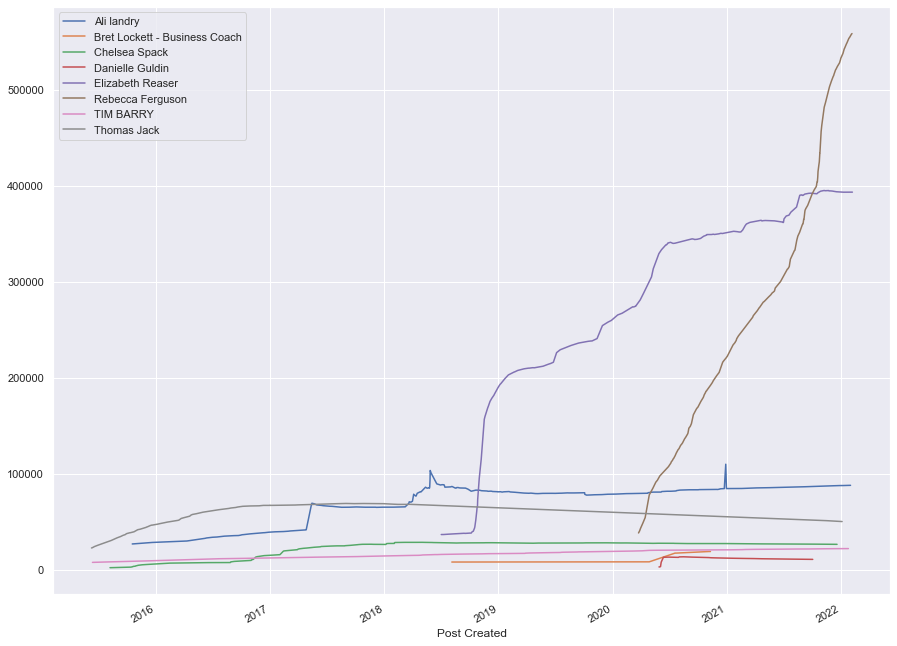

In [60]:
chosen10 = instagram_data.loc[instagram_data['User Name'].isin(choices)]

%matplotlib inline
chosen10_data = chosen10.loc[:,['Followers at Posting','Account','Post Created']]
chosen10_data['Post Created'] = pd.to_datetime(chosen10_data['Post Created'])
chosen10_data = chosen10_data.set_index('Post Created')
fig, ax = plt.subplots(figsize=(15,12))
chosen10_data.groupby('Account')['Followers at Posting'].plot(legend=True,ax=ax)

Cluster 0 (911) (e.g. thomasjack, chelseaspack): old, slow, slight drop <br>
Cluster 1 (329) (e.g. alilandry, _tim_barry_): old, slow, slight grow <br>
Cluster 2 (2) (e.g. elizabethreaser, officialrebeccaferguson): new, fast, big grow <br>
Cluster 3 (2) (e.g. danielleguldin, bret_lockett): new, slow, discontinued

### 5. Accounts Clustering with Gaussian Mixture Model (for Ref Only)

In [62]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(X_std)

GaussianMixture(n_components=4)

In [68]:
#predictions from gmm
labels = gmm.predict(X_std)
X_selected['Cluster Class'] = pd.Series(labels,index=X_selected.index)

X_selected[X_selected['Cluster Class']==0]

,Followers at Posting - last,Followers at Posting - max,Followers at Posting - var,post_count,Total Interactions - median,Total Interactions - max,Total Interactions - var,Comments - median,Comments - max,Comments - var,...,assent,nonflu,filler,Period,QMark,Exclam,Dash,Apostro,Parenth,Cluster Class
User Name,,,,,,,,,,,,,,,,,,,,,
98chrissmith,10820.0,57092.0,3.052899e+08,124,1667.5,14410,3.238279e+06,34.5,1759,37419.469447,...,0.150873,0.069603,0.000000,7.841667,0.986984,5.753651,1.140556,2.460794,0.521190,0
_tim_barry_,21081.0,21941.0,9.578623e+06,480,1156.5,5088,3.250419e+05,21.0,591,1641.844637,...,0.208439,0.132846,0.000000,7.115909,0.441107,5.141265,2.038735,2.219862,0.629190,0
aaronchase,14865.0,54330.0,1.205983e+08,1054,1345.5,6877,3.970273e+05,12.0,374,466.581258,...,0.383892,0.194782,0.024280,8.989830,0.691544,4.155237,0.729924,1.687292,0.554394,0
achando,54585.0,58351.0,1.805963e+06,360,1848.0,11716,1.737824e+06,17.0,544,2948.625689,...,0.512361,0.280528,0.001972,8.908667,0.519833,4.332139,0.592833,2.039417,0.535500,0
adamrbeach,51885.0,61677.0,1.458145e+08,261,1826.0,8829,2.199889e+06,41.0,412,5227.153787,...,0.106322,0.444713,0.000000,9.923755,0.448123,2.843257,0.469923,2.072375,0.767816,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wooddro52,46817.0,59659.0,7.020829e+07,373,1737.0,11097,1.460398e+06,32.0,433,2666.822321,...,0.513787,0.100667,0.002267,9.066480,0.527573,4.191867,0.905067,2.105013,0.442400,0
yellestagram,57620.0,62415.0,1.386148e+08,305,1613.0,9106,2.653240e+06,29.0,679,8477.188913,...,0.289148,0.092328,0.000000,7.831836,0.656787,4.754098,0.600951,2.319475,0.548590,0
yukamoumoon,8841.0,13982.0,2.839228e+06,424,1030.5,2485,1.193820e+05,11.0,85,103.567906,...,0.198281,0.124842,0.000000,7.342081,0.407511,4.352104,2.051357,1.892059,0.528801,0


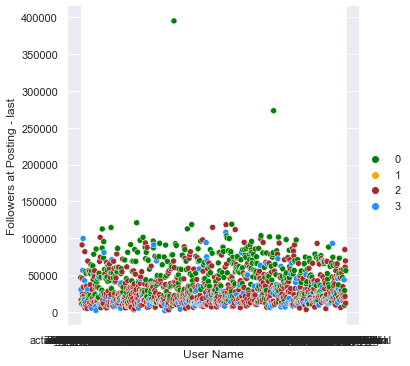

In [69]:
#Plot cluster membership
sns.relplot(x = X_selected.index, y = 'Followers at Posting - last', hue=labels, data=X_selected, 
            palette=['green','orange','brown','dodgerblue']);

In [70]:
#Count observations in each cluster
import collections, numpy
collections.Counter(labels)

Counter({2: 634, 3: 175, 0: 433, 1: 2})

In [71]:
#Attributes of each cluster center
kmeans.cluster_centers_

names = []
for i in X_selected.columns:
    names.append(i)

input_list = names
cluster1 = kmeans.cluster_centers_[0]
cluster2 = kmeans.cluster_centers_[1]
cluster3 = kmeans.cluster_centers_[2]
cluster4 = kmeans.cluster_centers_[3]
#cluster5 = kmeans.cluster_centers_[4]
#cluster6 = kmeans.cluster_centers_[5]
  
for i in range(24):
    print(input_list[i]+"-0:"+str(cluster1[i]))
    print(input_list[i]+"-1:"+str(cluster2[i]))
    print(input_list[i]+"-2:"+str(cluster3[i]))
    print(input_list[i]+"-3:"+str(cluster4[i]))
    #print(input_list[i]+"-5:"+str(cluster5[i]))
    #print(input_list[i]+"-6:"+str(cluster6[i]))

Followers at Posting - last-0:-0.2709446636244405
Followers at Posting - last-1:0.6900681904112412
Followers at Posting - last-2:10.84344048479324
Followers at Posting - last-3:-0.9443635265098901
Followers at Posting - max-0:-0.3115636630980772
Followers at Posting - max-1:0.7892434812342264
Followers at Posting - max-2:13.004647096242664
Followers at Posting - max-3:-0.9179512180987395
Followers at Posting - var-0:-0.09993581082915323
Followers at Posting - var-1:0.13090117667863063
Followers at Posting - var-2:24.129907059614254
Followers at Posting - var-3:-0.1423887905696856
post_count-0:-0.44256922395268394
post_count-1:1.2293493026660165
post_count-2:0.06166420640091943
post_count-3:-0.6993429845130553
Total Interactions - median-0:-0.11642688489362352
Total Interactions - median-1:0.23926236106361018
Total Interactions - median-2:14.148439527313183
Total Interactions - median-3:-0.4746518532315207
Total Interactions - max-0:-0.2449671909448925
Total Interactions - max-1:0.56723

In [72]:
#Silhouette Score to measure performance of model

from sklearn.metrics import silhouette_samples
silhouette = silhouette_samples(X_selected,labels)

df = pd.DataFrame({'label':labels,'silhouette':silhouette})
print('Average Silhouette Score for Cluster 0: ',numpy.average(df[df['label'] == 0].silhouette))
print('Average Silhouette Score for Cluster 1: ',numpy.average(df[df['label'] == 1].silhouette))
print('Average Silhouette Score for Cluster 2: ',numpy.average(df[df['label'] == 2].silhouette))
print('Average Silhouette Score for Cluster 3: ',numpy.average(df[df['label'] == 3].silhouette))
#print('Average Silhouette Score for Cluster 4: ',numpy.average(df[df['label'] == 4].silhouette))
#print('Average Silhouette Score for Cluster 5: ',numpy.average(df[df['label'] == 5].silhouette))

from sklearn.metrics import silhouette_score
silhouette_score(X_selected,labels)

Average Silhouette Score for Cluster 0:  -0.8061544127489938
Average Silhouette Score for Cluster 1:  -0.5002997132281729
Average Silhouette Score for Cluster 2:  -0.13800645448461457
Average Silhouette Score for Cluster 3:  0.18461191431874047


-0.3257672566593543

In [92]:
X_selected[['elizabethreaser' in s for s in X_selected.index]]

,Followers at Posting - last,Followers at Posting - max,Followers at Posting - var,post_count,Total Interactions - median,Total Interactions - max,Total Interactions - var,Comments - median,Comments - max,Comments - var,...,assent,nonflu,filler,Period,QMark,Exclam,Dash,Apostro,Parenth,Cluster Class
User Name,,,,,,,,,,,,,,,,,,,,,
elizabethreaser,395362.0,395362.0,1.420404e+10,211,9495.0,63632,1.025029e+08,52.0,761,8646.507967,...,0.06455,0.037441,0.0,8.671137,0.588815,3.351137,1.284976,1.796635,0.602844,0


In [95]:
choices = ['alilandry','chelseaspack', # cluster 0
           'danielleguldin','bret_lockett', # cluster 1
           'thomasjack','duzer', # cluster 2
           'sandi_thom','pinka_makeup'] # cluster 3

Account
Ali landry                       AxesSubplot(0.125,0.2;0.775x0.68)
Bret Lockett - Business Coach    AxesSubplot(0.125,0.2;0.775x0.68)
Chelsea Spack                    AxesSubplot(0.125,0.2;0.775x0.68)
Danielle Guldin                  AxesSubplot(0.125,0.2;0.775x0.68)
MAQUILLAJE  PEINADO Y CEJAS      AxesSubplot(0.125,0.2;0.775x0.68)
Ryan Van Duzer                   AxesSubplot(0.125,0.2;0.775x0.68)
S A N D I   T H O M              AxesSubplot(0.125,0.2;0.775x0.68)
Thomas Jack                      AxesSubplot(0.125,0.2;0.775x0.68)
Name: Followers at Posting, dtype: object

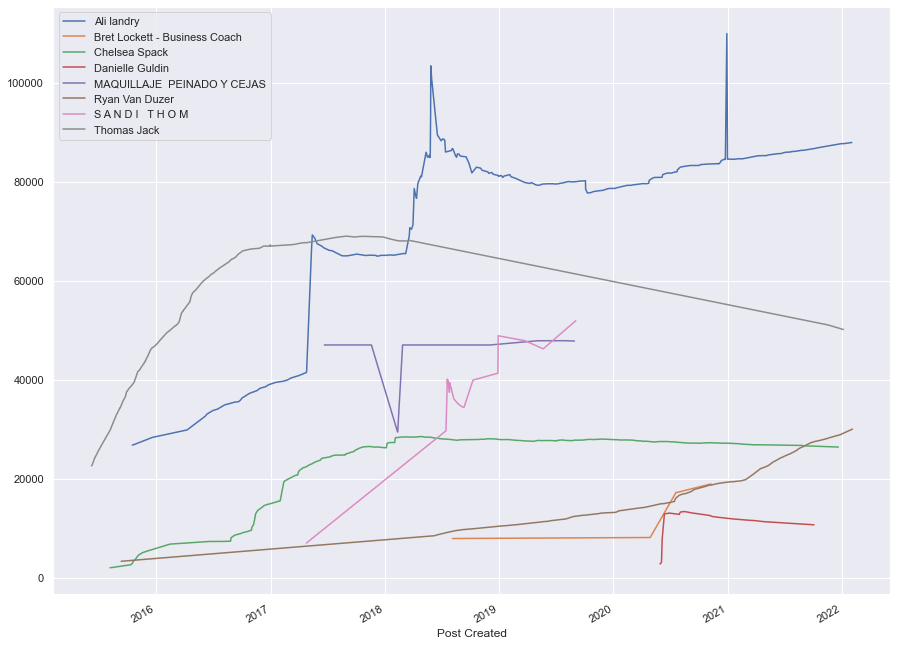

In [96]:
chosen10 = instagram_data.loc[instagram_data['User Name'].isin(choices)]

%matplotlib inline
chosen10_data = chosen10.loc[:,['Followers at Posting','Account','Post Created']]
chosen10_data['Post Created'] = pd.to_datetime(chosen10_data['Post Created'])
chosen10_data = chosen10_data.set_index('Post Created')
fig, ax = plt.subplots(figsize=(15,12))
chosen10_data.groupby('Account')['Followers at Posting'].plot(legend=True,ax=ax)

Cluster 0 (433) (e.g. alilandry, chelseaspack): old, slow, slight grow <br>
Cluster 1 (2) (e.g. danielleguldin, bret_lockett): new, slow, discontinued <br>
Cluster 2 (634) (e.g. thomasjack, duzer): <br>
Cluster 3 (175) (e.g. sandi_thom, pinka_makeup): new, overall stable with some variance <br><br>
Seem no simple explaination